# Lecture 15: Linear regression

Today we will learn the simpliest regression.

In previous lab practice, we learned how to import data from [UCI machine learning dataset repository](https://archive.ics.uci.edu/ml/datasets.html). 

* Download `winequality-red.csv` from [UCI machine learning repo on Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/), unzip it and put it in the same directory with this notebook.
* Check the csv file using Excel on the lab computer. Import the data using the following command.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Check the [csv preview on Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), we will use the first three columns: `fixed acidity`, `volatile acidity`, and `citric acid`, we are interested how these every two quantities are related.

In [ ]:
wine_data = np.loadtxt('winequality-red.csv', delimiter=',', skiprows=1, usecols = [0,1,2])
# first row is the label
# check the delimiter using a text editor to open this csv
# usecols = the columns in the original csv we want to use

In [8]:
wine_data.shape

(1599, 3)

In [10]:
fix_acid = wine_data[:,0]
vol_acid = wine_data[:,1]
ctr_acid = wine_data[:,2]

In [11]:
print(fix_acid[:10])
print(vol_acid[:10])
print(ctr_acid[:10])

[ 7.4  7.8  7.8 11.2  7.4  7.4  7.9  7.3  7.8  7.5]
[0.7  0.88 0.76 0.28 0.7  0.66 0.6  0.65 0.58 0.5 ]
[0.   0.   0.04 0.56 0.   0.   0.06 0.   0.02 0.36]


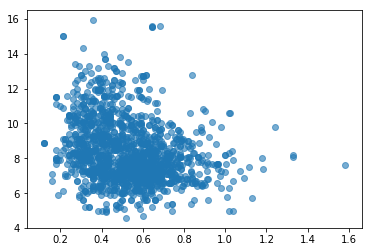

In [13]:
plt.scatter(vol_acid, fix_acid, alpha= 0.6)

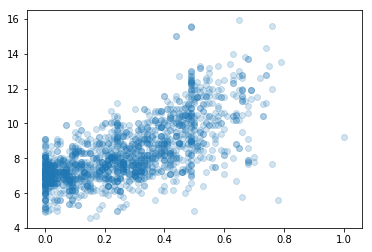

In [12]:
plt.scatter(ctr_acid, fix_acid, alpha=0.2)  # alpha makes the dots a little transparent
plt.show()

## Question 1: fixed acidity vs citric acid concentration

We would like to fit a line to this data. i.e., based on this information, what is the most likely linear relationship between the fixed acid and citric acid concentration of wine?

Since we are doing a linear model: if $x$ is the citric acid concentration, then the fixed acidity $y$ should be 

$$ y = w x + b.$$

So we are looking for $w$ (weight) and $b$ (bias) that will fit the line as well as possible to the data. What does that mean though? It means that we want to minimize the error that our linear model $y = wx + b$ will have on predicting the weight from the height on our existing data. On a fixed acidity-citric acid concentration pair $(x_i, y_i)$ from our data-set, the model is guessing $y = w x_i + b$, and the actual answer is $y_i$. The total squared error (called *Loss*) is:

$$L(w,b) = \sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2$$

where $\{(x_i, y_i)\}$ are our fixed acidity-citric acid concentration pairs. 

* Why squared error and not sum of absolute values?" you might say, both are good options. There are good reasons to go for squared error as the first choice, long story but it has something to do with the Gaussian distribution is concentrated toward its mean).

We want to minimize this squared error function above. We can:

* Solve $\nabla_{w,b} L(w,b) = 0$. The gradient will be zero at a local minimum.
* Use gradient descent.

**Remark**: the loss function is a function in $w$ and $b$!!!!.

## First method (please derive by yourself after class again): 

Solving the gradient = 0. You write down the partial derivatives and solve the linear equations for $w$ and $b$. 
$$\frac{\partial}{\partial b} L(w,b) = 2  \sum\limits_{i=1}^N \big(w x_i + b-y_i\big) = 0$$

$$\frac{\partial}{\partial w} L(w,b) = 2  \sum\limits_{i=1}^N (w x_i + b-y_i) \cdot x_i) = 0$$

Simplifying the first equation is straightforward:
$$wX + Nb − Y = 0, \quad \text{where} \quad X = \sum\limits_{i=1}^N x_i, \quad Y = \sum\limits_{i=1}^N y_i .$$
Simplifying the second equaton:
$$
w\sum\limits_{i=1}^N x_i^2 - b\sum\limits_{i=1}^N x_i -  \sum\limits_{i=1}^N x_i y_i
= wA + bX - C = 0, 
\quad \text{where} \quad A = \sum\limits_{i=1}^N x_i^2, \quad C = \sum\limits_{i=1}^N x_i y_i.
$$
Solving this linear system yields:
$$
w = \frac{XY - NC}{X^2 - NA}, \quad \text{ and } \quad b = \frac{AY - CX}{NA - X^2}.
$$
If we digging deeper to simplify:
$$
w =\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}
\quad \text{ and } b = \bar{y}  - w\bar{x},
$$
where $\bar{x}$ and $\bar{y}$ are the averages of the data
$$
\bar{x} = \frac{1}{N}\sum\limits_{i=1}^N x_i, \quad\text{ and } \quad 
\bar{y} = \frac{1}{N}\sum\limits_{i=1}^N y_i.
$$


Let's code it up. 

In [ ]:
x = ctr_acid
y = fix_acid
N = len(x)
X = np.sum(x)
A = np.sum(x * x)  # sum of the squares
C = np.sum(x * y)   # sum of x_i * y_i
Y = np.sum(y)
w = (X*Y - N*C) / (X**2- N*A)
b = (A*Y - C*X) / (N*A - X**2)

In [ ]:
# more statistical representation
x_bar = np.mean(x)
y_bar = np.mean(y)
w = np.sum( (x-x_bar) * (y-y_bar) )/ np.sum( (x-x_bar)**2 )
b = y_bar - w*x_bar

In [ ]:
XX = np.linspace(0,1,200)
YY = w * XX + b
plt.scatter(ctr_acid, fix_acid, alpha=0.1)
plt.plot(XX,YY,color='red',linewidth = 4, alpha=0.4)
plt.show()

## Least square

This is called a *closed-form solution* because we are getting straight to the answer. (no gradient descent or approximation)

It's called the **least squares** method. 

## In-class Exercise: 
* Repeat the procedure above for `vol_acid` and `fix_acid` using both explicit formula.
* Implement the mean square error measure:
$$
\text{MSE} = \frac{1}{N_{\text{test}}} \sum_{i=1}^{N_{\text{test}}} 
\Big(y^{\text{Pred}}_i - y^{\text{Actual}}_i\Big)^2.
$$

## Least-square fitting using the built-in library:

No need to be a hero every time. We can use scikit-learn's [`LinearRegression()` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

You train the parameters by using the `fit` function and you use the function it learns using the `predict` function. 

In [16]:
# reshape(-1,1) trick
print(np.shape(np.arange(10)))
print(np.shape(np.arange(10).reshape(-1,1)))

(10,)
(10, 1)


In [17]:
np.arange(10).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [23]:
# example why this is useful
arr1 = np.arange(12).reshape(4,3)
arr1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [30]:
arr3 = np.arange(25).reshape(5,5)
arr3.reshape(-1,1).shape

(25, 1)

In [27]:
arr2 = np.array([0.1, 0.2, 0.3, 0.1])
(arr2.T).shape

(4,)

In [26]:
arr2.reshape(-1,1)*arr1

array([[0. , 0.1, 0.2],
       [0.6, 0.8, 1. ],
       [1.8, 2.1, 2.4],
       [0.9, 1. , 1.1]])

In [ ]:
from sklearn import linear_model
acid_regression = linear_model.LinearRegression()
acid_regression.fit(ctr_acid.reshape(-1, 1), fix_acid.reshape(-1, 1))
X_test = np.linspace(0,1,200).reshape(-1, 1)
y_pred = acid_regression.predict(X_test)
plt.scatter(ctr_acid, fix_acid, alpha=0.1)
plt.plot(X_test,y_pred,color='red',linewidth = 4, alpha=0.4)
plt.show()

## In-class exercise:
* Read the examples in [`LinearRegression()` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), and apply scikit-learn's linear regression model on total sulfur dioxide vs pH in `winequality-red.csv`.